___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [30]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


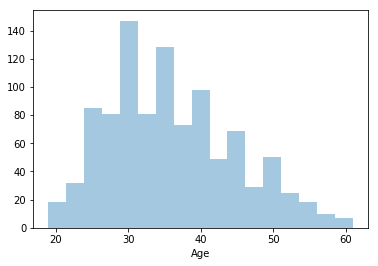

In [6]:
sns.distplot(df['Age'], kde=False)

**Create a jointplot showing Area Income versus Age.**

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


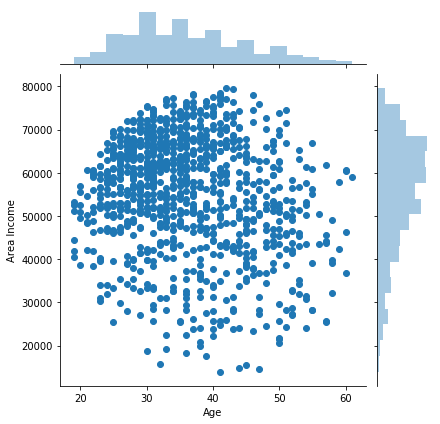

In [7]:
sns.jointplot(x='Age', y='Area Income', data=df)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


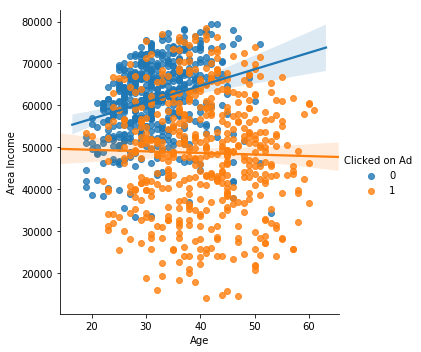

In [8]:
sns.lmplot(x='Age', y='Area Income',data=df, hue='Clicked on Ad')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


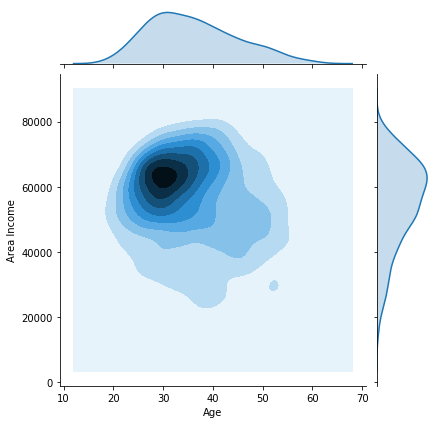

In [9]:
sns.jointplot(x='Age', y='Area Income', kind='kde',data=df)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


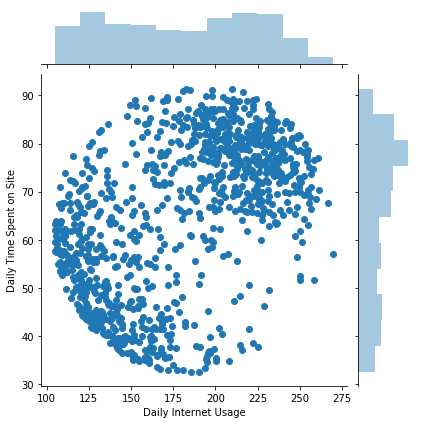

In [10]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site',data=df)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


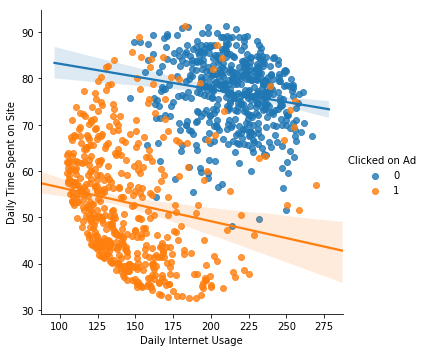

In [11]:
sns.lmplot(x='Daily Internet Usage', y='Daily Time Spent on Site',data=df, hue='Clicked on Ad')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


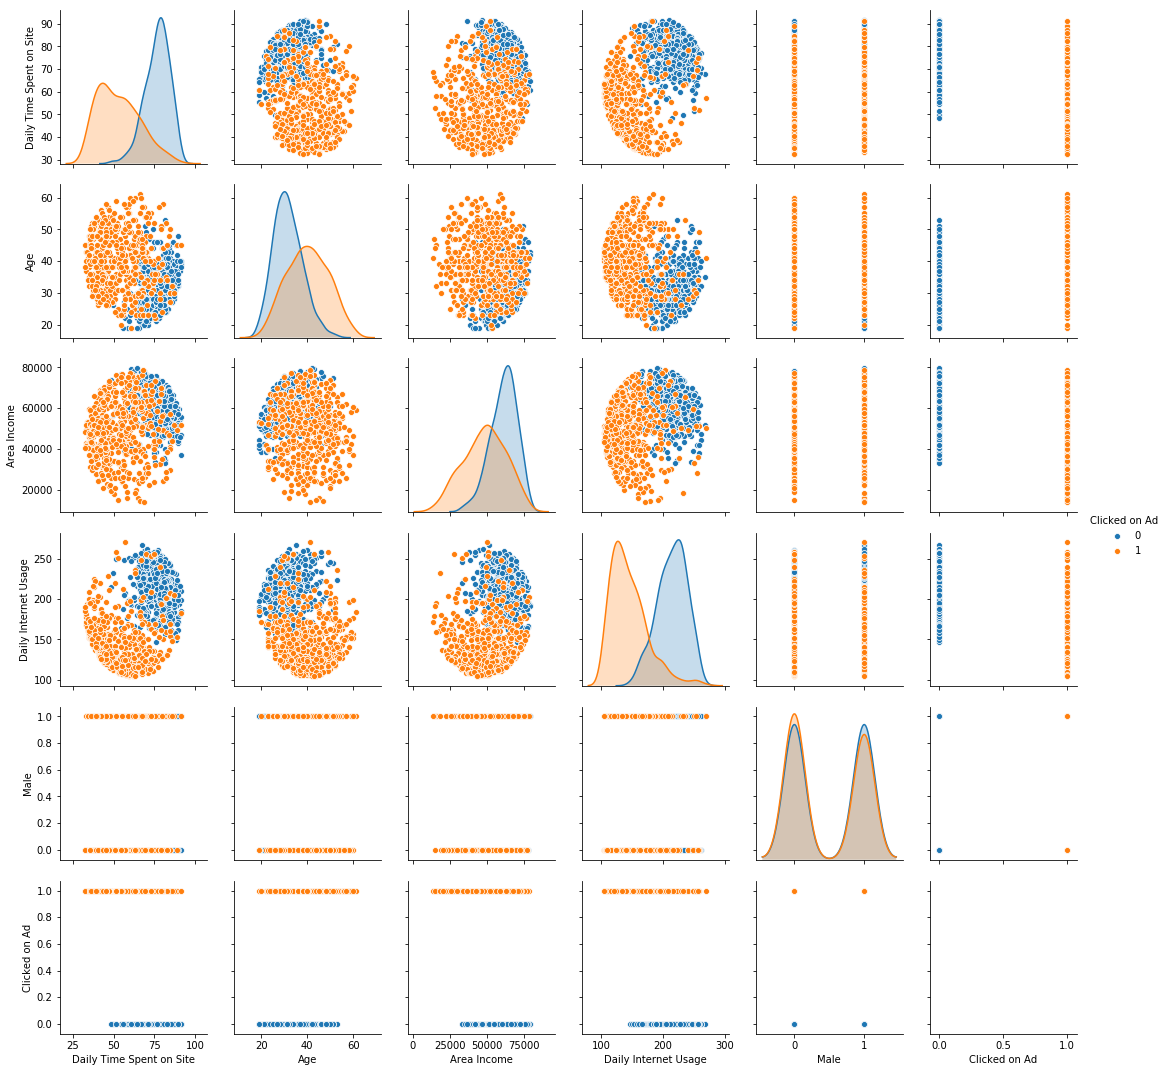

In [12]:
sns.pairplot(df, hue='Clicked on Ad')

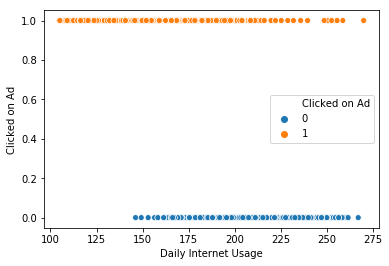

In [4]:
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df, hue='Clicked on Ad')

In [31]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
# fit a linear regression model and store the predictions
feature_cols = ['Daily Internet Usage']
X = df[feature_cols]
y = df['Clicked on Ad']
linreg.fit(X, y)
df['clicked_pred'] = linreg.predict(X)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


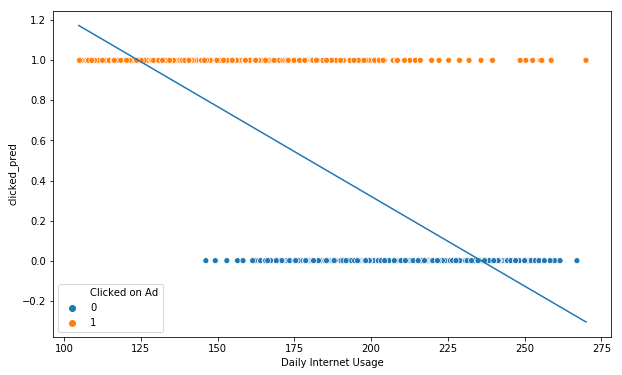

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df, hue='Clicked on Ad', ax=ax)
sns.lineplot(x='Daily Internet Usage', y='clicked_pred', data=df, ax=ax)

In [33]:
df['clicked_pred_log'] = df['clicked_pred'].apply(lambda y: np.log(y/(1-y)))

In [36]:
df['clicked_pred_log_x'] = df['clicked_pred'].apply(lambda y: y/(1+y))

In [39]:
df.head(25)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,clicked_pred,clicked_pred_log,clicked_pred_log_x
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,-0.181941,NaN,-0.222406
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.376590,-0.504048,0.273567
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,-0.006370,NaN,-0.006410
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,-0.090526,NaN,-0.099536
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.091499,-2.295470,0.083829
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,0.081103,-2.427460,0.075018
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,0.245830,-1.120979,0.197322
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,0.932343,2.623246,0.482493
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,0.127975,-1.918979,0.113456
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,0.465765,-0.137155,0.317762


/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


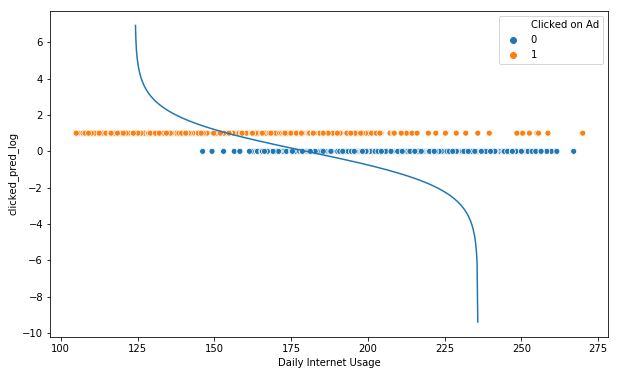

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df, hue='Clicked on Ad', ax=ax)
sns.lineplot(x='Daily Internet Usage', y='clicked_pred_log', data=df, ax=ax)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


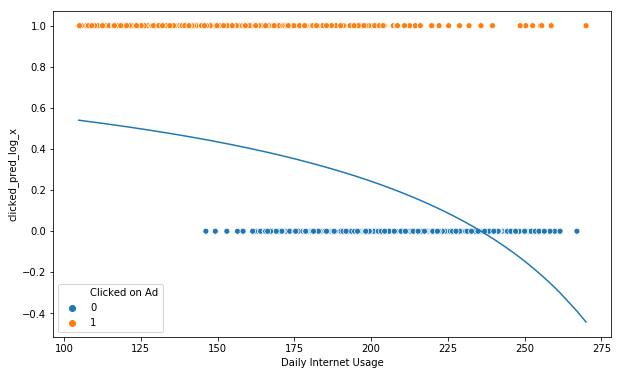

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df, hue='Clicked on Ad', ax=ax)
sns.lineplot(x='Daily Internet Usage', y='clicked_pred_log_x', data=df, ax=ax)

In [16]:
df[(df['clicked_pred']>0.49)&(df['clicked_pred']<0.51)]['Daily Internet Usage'].mean()

180.20300000000003

In [46]:
1 / (1+ np.exp((-1*(linreg.intercept_ + (linreg.coef_[0] * 256.09)))))

0.45463974355605363

In [44]:
np.exp(logreg.intercept_[0] + (logreg.coef_*256.09))

array([[0.01965163]])

In [17]:
df['clicked_pred_class'] = np.where(df['clicked_pred']>0.5, 1, 0)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


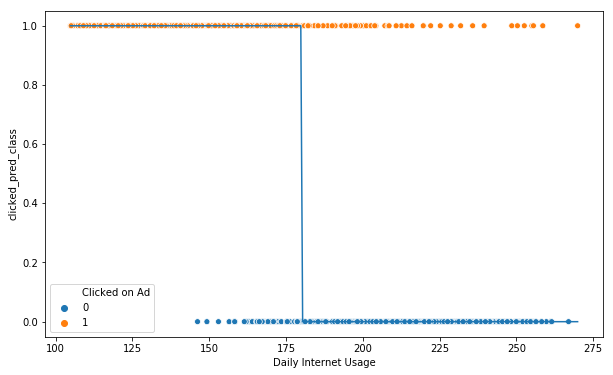

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df, hue='Clicked on Ad', ax=ax)
sns.lineplot(x='Daily Internet Usage', y='clicked_pred_class', data=df, ax=ax)

In [19]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['Daily Internet Usage']
X = df[feature_cols]
y = df['Clicked on Ad']
logreg.fit(X, y)
df['clicked_log_class'] = logreg.predict(X)
df['clicked_log_pred'] = logreg.predict_proba(X)[:, 1]

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


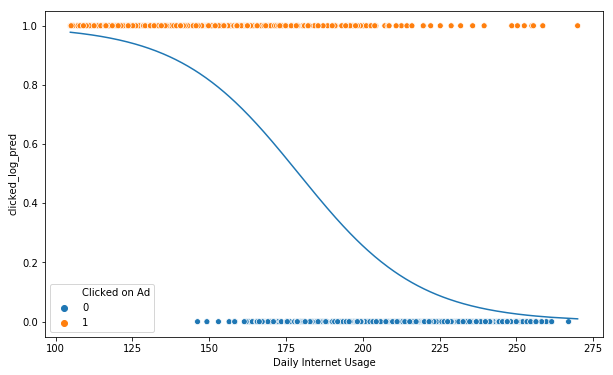

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df, hue='Clicked on Ad', ax=ax)
sns.lineplot(x='Daily Internet Usage', y='clicked_log_pred', data=df, ax=ax)

In [21]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,clicked_pred,clicked_pred_class,clicked_log_class,clicked_log_pred
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,-0.181941,0,0,0.019273
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.376590,0,0,0.321622
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,-0.006370,0,0,0.050741
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,-0.090526,0,0,0.032028
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0.091499,0,0,0.085398


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [22]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'clicked_pred', 'clicked_pred_class',
       'clicked_log_class', 'clicked_log_pred'],
      dtype='object')

In [23]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [27]:
y_pred = lr.predict(X_test)

** Create a classification report for the model.**

In [28]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.84      0.95      0.89       146\n          1       0.95      0.83      0.89       154\n\navg / total       0.90      0.89      0.89       300\n'

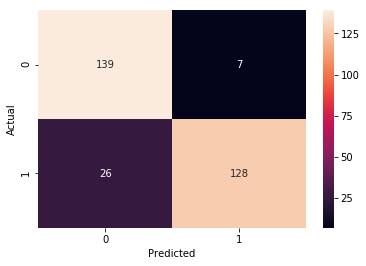

In [29]:
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='g')

## Great Job!